In [32]:
import numpy as np
from tqdm import tqdm
import networkx as nx
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pickle
import os
import glob
import json
import shutil
import pandas
%matplotlib inline

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import tree

> `./python/graph2vec`
>
> `python src/graph2vec.py --dimensions 12 --wl-iterations 20 --epochs 128 --min-count 0` 

In [30]:
a = glob.glob('./the_beatles_1916-2d/*.edgelist')
b = glob.glob('./ramones_555-2d/*.edgelist')
len(a),len(b)

(33, 22)

In [28]:
!mkdir stuff2-g

In [29]:
despath = './stuff2-g/'
counter = 0
for p in a:
    with open(p) as f:
        ll = f.readlines()
    ll = [i[:-4] for i in ll]
    ll = [i.split() for i in ll]
    d = {'edges':ll}
    p = despath+str(counter).zfill(3)+'.json'
    json.dump(d,open(p,'w'))
    counter+=1
for p in b:
    with open(p) as f:
        ll = f.readlines()
    ll = [i[:-4] for i in ll]
    ll = [i.split() for i in ll]
    d = {'edges':ll}
    p = despath+str(counter).zfill(3)+'.json'
    json.dump(d,open(p,'w'))
    counter+=1

In [31]:
# a->beatles->0 len(a)=33  b->ramones->1 len(b)=22
y = [0 for i in range(33)]+[1 for i in range(22)]

In [454]:
df = pandas.read_csv('/Users/xieewenz/python/graph2vec/features/nci1.csv')
df = df.drop('type',axis=1)
df.head(5)


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11
0,1.215928,-0.948790,-0.154740,-1.632529,4.751432,1.702966,0.550388,0.826934,0.669837,2.256112,4.837352,4.653068
1,-2.563056,-3.773499,-2.633423,2.852811,4.296122,1.116735,-1.472987,-3.292879,2.128016,-2.137846,2.916173,-1.234232
2,0.264857,-1.655067,-1.419354,-1.230434,-0.122178,0.497281,0.200791,-1.621371,7.166237,-2.945855,3.558334,-1.096188
3,2.703926,-4.040882,-3.375838,-0.955576,2.533368,3.826836,-1.495002,2.310414,3.098717,-4.048556,0.634762,-0.774064
4,-2.749662,-3.382160,1.927140,0.730804,4.124306,1.671919,1.834919,0.941282,5.362881,-0.299362,0.254073,1.333336


In [455]:
X = np.array(df)

In [456]:
ala = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = svm.SVC(kernel='rbf',gamma='auto')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    ala.append(accuracy_score(y_test, y_pred))
sum(ala)/1000

0.6697058823529377

In [457]:
ala2 = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    tc = tree.DecisionTreeClassifier()

    tc = tc.fit(X_train, y_train)
    y_pred = tc.predict(X_test)
    ala2.append(accuracy_score(y_test, y_pred))
sum(ala2)/1000

0.6130588235294082

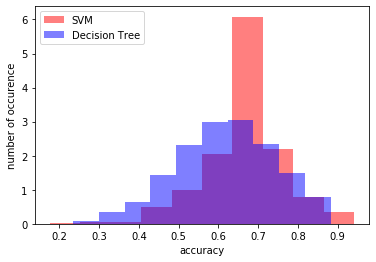

In [458]:
plt.xlabel('accuracy')
plt.ylabel('number of occurence')
plt.hist(ala, color='red', alpha=0.5, label='SVM', density=True)
plt.hist(ala2, color='blue', alpha=0.5, label='Decision Tree', density=True)
plt.legend()

> 6 features 0.7 svm     0.55 Tree
>
> 12 features 0.69 svm     0.61 Tree

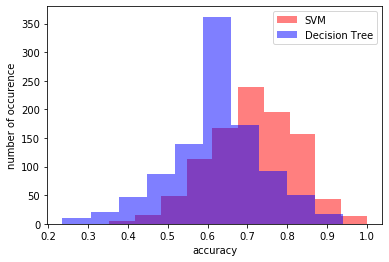